In [ ]:

#Imports
import torch
import torchvision
import torch.nn as nn
from torchsummary import summary

import torch.nn.functional as F
import matplotlib.pyplot as plt

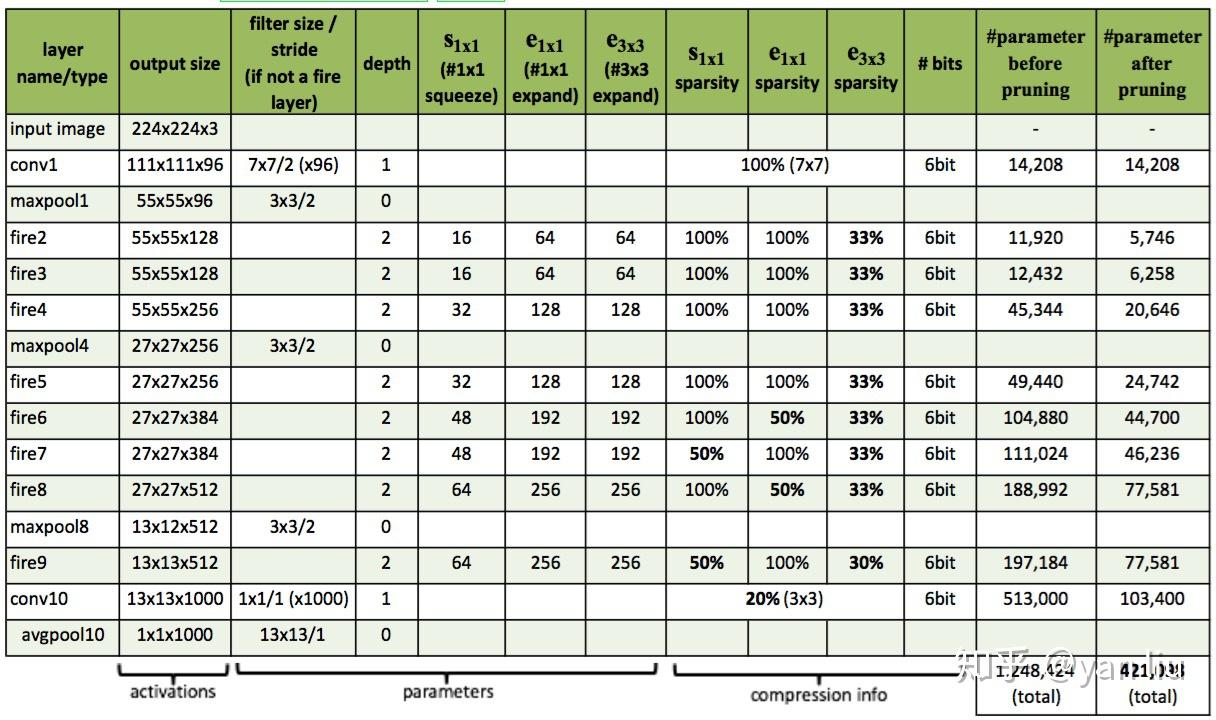

In [40]:
#SqueezeNet
class Fire(nn.Module):
    def __init__(self,input_channels,fs,fe):
      super().__init__() 
      self.s=nn.Conv2d(in_channels=input_channels, out_channels=fs, kernel_size=1)
      self.e1=nn.Conv2d(in_channels=fs, out_channels=fe,kernel_size=1)
      self.e2=nn.Conv2d(in_channels=fs, out_channels=fe, kernel_size=3,padding=1)
    def forward(self,x):
      s=F.relu(self.s(x))
      x1=F.relu(self.e1(s))
      x2=F.relu(self.e2 (s))
      output=torch.cat([x1,x2],1)
     
      return output


class SqueezeNet(nn.Module):
    def __init__(self,input_channels=3,num_classes=1000):
      super().__init__()

      self.conv1=nn.Conv2d(in_channels=input_channels,out_channels=96,kernel_size=7,stride=2,padding=2)
      self.maxpool1=nn.MaxPool2d(3, stride=2,padding=0)
      
      self.fire2=Fire(96,16,64)
      self.fire3=Fire(128,16,64)
      self.fire4=Fire(128,32,128)
      self.maxpool4=nn.MaxPool2d(3, stride=2,padding=0)

      self.fire5=Fire(256,32,128)
      self.fire6=Fire(256,48,192)
      self.fire7=Fire(384,48, 192)
      self.fire8=Fire(384,64, 256)
      self.maxpool8=nn.MaxPool2d(3, stride=2,padding=0)
      self.fire9=Fire(512,64, 256)

      self.conv10=nn.Conv2d(512,num_classes,1)

      self.avg_pool2d=nn.AdaptiveAvgPool2d((1,1))
      
      self.flatten=nn.Flatten()
      self.softmax=nn.Softmax(dim=1)
      
    def forward(self,x):
      x=F.relu(self.conv1(x))
      x=self.maxpool1(x)
      x=self.fire2(x)
      x=self.fire3(x)
      x=self.fire4(x)
      x=self.maxpool4(x)
      x=self.fire5(x)
      x=self.fire6(x)
      x=self.fire7(x)
      x=self.fire8(x)
      x=self.maxpool8(x)
      x=self.fire9(x)
      x=self.conv10(x)
      x=self.avg_pool2d(x)
      x=self.flatten(x)
      out=self.softmax(x)
      return out



input_sample = torch.rand((1,3, 224, 224))
model=SqueezeNet(3,1000)
out=model(input_sample)
print(out.shape)









torch.Size([1, 1000])


In [41]:
model

SqueezeNet(
  (conv1): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fire2): Fire(
    (s): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
    (e1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
    (e2): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (fire3): Fire(
    (s): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
    (e1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
    (e2): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (fire4): Fire(
    (s): Conv2d(128, 32, kernel_size=(1, 1), stride=(1, 1))
    (e1): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
    (e2): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (maxpool4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fire5): Fire(
    (s): Conv2d(256, 32, kernel_size=(1, 1), stride=(1, 1))
    (